# ***Name***: **Nader Mohamed Elhadedy**

In [ ]:
#import Libaries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
x = pd.read_table("iris.names")

In [ ]:
x

,1. Title: Iris Plants Database
NaN,Updated Sept 21 by C.Blake - Added discrepency...
2. Sources:,NaN
(a) Creator: R.A. Fisher,NaN
(b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov),NaN
"(c) Date: July, 1988",NaN
3. Past Usage:,NaN
- Publications: too many to mention!!! Here are a few.,NaN
"1. Fisher,R.A. ""The use of multiple measurements in taxonomic problems""",NaN
"Annual Eugenics, 7, Part II, 179-188 (1936); also in ""Contributions",NaN
"to Mathematical Statistics"" (John Wiley, NY, 1950).",NaN


In [ ]:
cols = ["sepal length", "sepal width", "petal length", "petal width", "class"]

In [ ]:
#Read input dataset
df = pd.read_csv("iris.data", names=cols)

In [ ]:
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
#Describe dataset
df.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#get info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


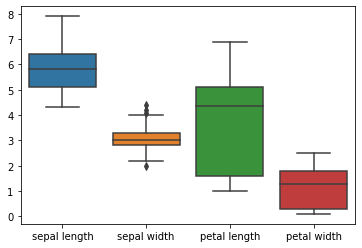

In [ ]:
# Check for outliers
sns.boxplot(data=df)

In [ ]:
Q1 = np.percentile(df['sepal width'], 25,interpolation = 'midpoint') 
  
Q3 = np.percentile(df['sepal width'], 75,interpolation = 'midpoint') 
IQR = Q3 - Q1 
print('IQR =', IQR)

IQR = 0.5


In [ ]:
print("Old Shape: ", df.shape) 
  
# Upper bound
upper = np.where(df['sepal width'] >= (Q3+1.5*IQR))
# Lower bound
lower = np.where(df['sepal width'] <= (Q1-1.5*IQR))
  

df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
  
print("New Shape: ", df.shape) 

Old Shape:  (150, 5)
New Shape:  (146, 5)


In [ ]:
#check for missing data
df.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [ ]:
#drop duplicate data instances if any
print(df.duplicated().sum())
df = df.drop_duplicates()

3


In [ ]:
#find number of unique classes
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
#Check if dataset is balanced
df.groupby("class").size()

class
Iris-setosa        45
Iris-versicolor    49
Iris-virginica     49
dtype: int64

In [ ]:
# Visualization visual inspection of dataset

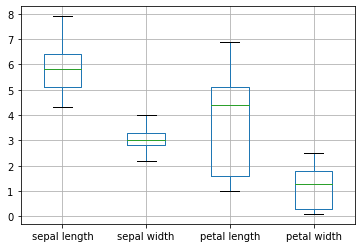

In [ ]:
#Box Plot for each input variable
df.boxplot()

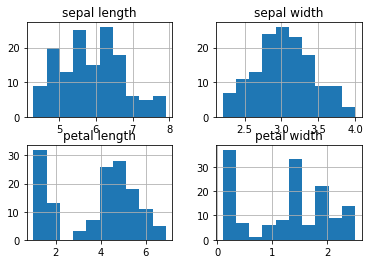

In [ ]:
#Histogram Plot for each input variable
df.hist()
plt.show()

In [ ]:
X = df[df.columns.difference(['class'])]
y = df['class']

In [ ]:
target = pd.factorize(df['class'])[0]

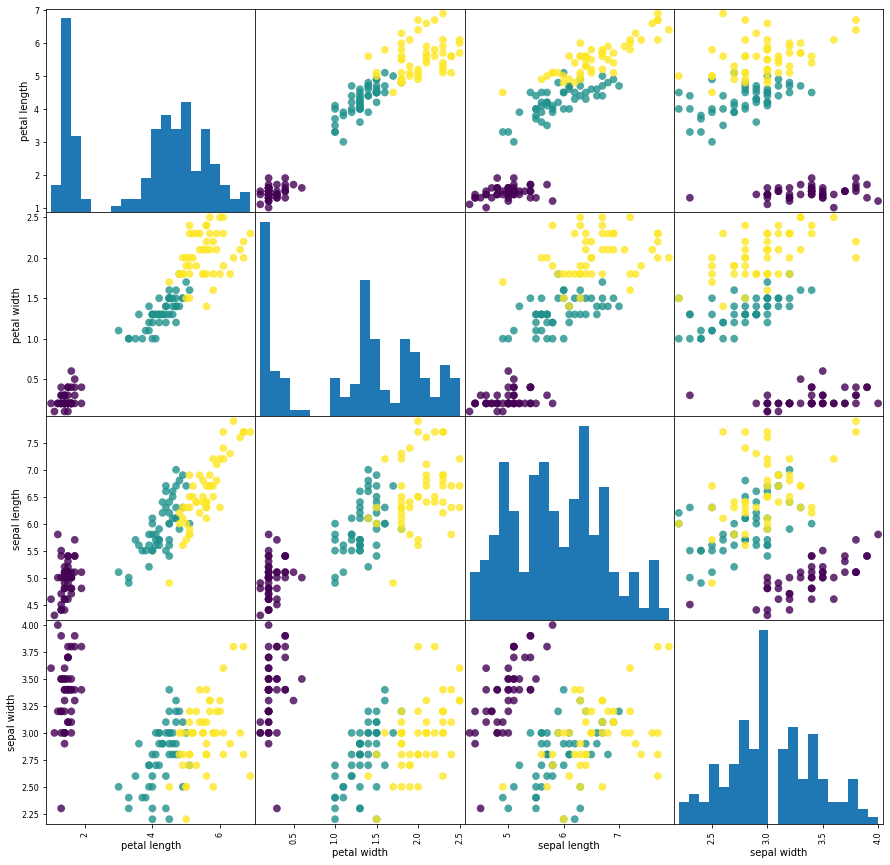

In [ ]:
#scatter Plot for two input variables
pd.plotting.scatter_matrix(X, figsize=(15,15),marker='o',hist_kwds={'bins':20},s=60,alpha=.8,c=target)
plt.show()

In [ ]:
#Statistical Summary after cleaning
df.describe()

,sepal length,sepal width,petal length,petal width
count,143.000000,143.000000,143.000000,143.000000
mean,5.870629,3.038462,3.830769,1.230769
std,0.835045,0.398222,1.750824,0.754538
min,4.300000,2.200000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.000000,6.900000,2.500000


In [ ]:
#Create Training and Test Sets and Apply Scaling
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Split the data into training and testing

In [ ]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.93
Accuracy of Logistic regression classifier on test set: 0.89


In [ ]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)
print('Accuracy of Decision Tree classifier on training set: {:.2f}'
     .format(clf.score(X_train, y_train)))
print('Accuracy of Decision Tree classifier on test set: {:.2f}'
     .format(clf.score(X_test, y_test)))

Accuracy of Decision Tree classifier on training set: 1.00
Accuracy of Decision Tree classifier on test set: 0.94


In [ ]:
#K nearest nighbor
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print('Accuracy of K-NN classifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of K-NN classifier on test set: {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of K-NN classifier on training set: 0.96
Accuracy of K-NN classifier on test set: 0.94


In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train)
print('Accuracy of SVM classifier on training set: {:.2f}'
     .format(svm.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
     .format(svm.score(X_test, y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.94


In [ ]:
#Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
print('Accuracy of GNB classifier on training set: {:.2f}'
     .format(gnb.score(X_train, y_train)))
print('Accuracy of GNB classifier on test set: {:.2f}'
     .format(gnb.score(X_test, y_test)))

Accuracy of GNB classifier on training set: 0.96
Accuracy of GNB classifier on test set: 0.94


<hr>

- **Changing number of neighbours and detecting accuracy score**

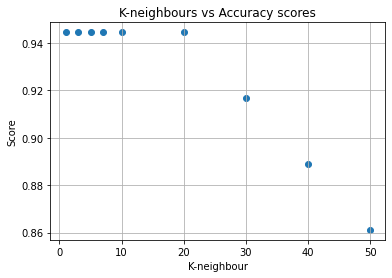

In [ ]:
Ks = [1, 3, 5, 7, 10, 20, 30, 40, 50]
scores = []
for i in Ks:
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.scatter(Ks, scores)
plt.xlabel("K-neighbour")
plt.ylabel("Score")
plt.title("K-neighbours vs Accuracy scores")
plt.grid()
plt.show()

<hr>

- **Generating 10 random train/test splits**

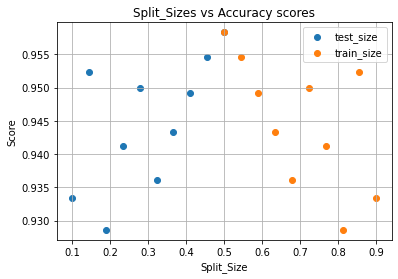

In [ ]:
#Create Training and Test Sets and Apply Scaling
sizes = np.linspace(0.1,0.5,10)
scores = []
for j in sizes:
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=j, random_state=0,)
  scaler = MinMaxScaler()
  X_train = scaler.fit_transform(X_train)
  X_test = scaler.transform(X_test)

  knn = KNeighborsClassifier()
  knn.fit(X_train, y_train)
  scores.append(knn.score(X_test, y_test))

plt.scatter(sizes, scores, label="test_size")
plt.scatter(1-sizes, scores, label="train_size")

plt.xlabel("Split_Size")
plt.ylabel("Score")
plt.title("Split_Sizes vs Accuracy scores")
plt.legend()
plt.grid()
plt.show()

<hr>

- **Changing parameters in different ML models**

In [ ]:
#Logistic Regression
logreg = LogisticRegression(penalty='none')
logreg.fit(X_train, y_train)
logreg.score(X_test, y_test)

0.9722222222222222

In [ ]:
#DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)
clf.score(X_test, y_test)

0.9583333333333334

In [ ]:
#SVC
svm = SVC(C=0.9)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.9444444444444444

In [ ]:
#Gaussian Naive Bayes
gnb = GaussianNB(var_smoothing=0)
gnb.fit(X_train, y_train)
gnb.score(X_test, y_test)

0.9444444444444444

<hr>